<a href="https://colab.research.google.com/github/MansiSambare/NNDL_LAB/blob/main/RNN_LSTM_for_Monthly_milk_ptoduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICAL 3**

**Aim:** To implement RNN/LSTM

**Theory**

Recurrent Neural Networks RNNs

👉 RNNs have feedback loops in the recurrent layer. This lets them maintain information in ‘memory’ over time. But, it can be difficult to train standard RNNs to solve problems that require learning long-term temporal dependencies.

👉 This is because the gradient of the loss function decays exponentially with time (called the vanishing gradient problem).

Long Short-Term Memory LSTM

👉 LSTM networks are a type of RNN that uses special units in addition to standard units. LSTM units include a ‘memory cell’ that can maintain information in memory for long periods of time. This memory cell lets them learn longer-term dependencies.

👉 LSTMs deal with vanishing and exploding gradient problem by introducing new gates, such as input and forget gates, which allow for a better control over the gradient flow and enable better preservation of “long-range dependencies”.

**Implementation**

Importing neccessary liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('monthly-milk-production-pounds.csv' , index_col='Month', parse_dates = True)
df.index.freq='MS'

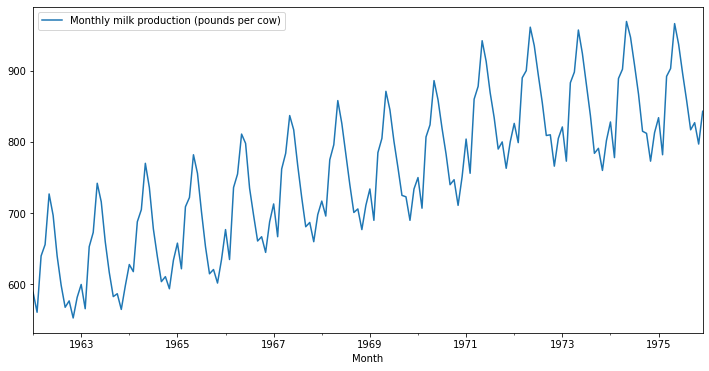

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


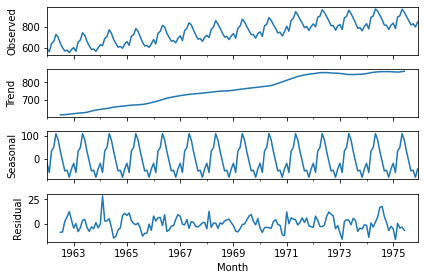

In [ ]:
results = seasonal_decompose(df['Monthly milk production (pounds per cow)'])
results.plot();

In [ ]:
len(df)

168

In [ ]:
train = df.iloc[:156]          #all data except last 12 month data
test = df.iloc[156:]           #last 12 month data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(), df.tail()

(            Monthly milk production (pounds per cow)
 Month                                               
 1962-01-01                                       589
 1962-02-01                                       561
 1962-03-01                                       640
 1962-04-01                                       656
 1962-05-01                                       727,
             Monthly milk production (pounds per cow)
 Month                                               
 1975-08-01                                       858
 1975-09-01                                       817
 1975-10-01                                       827
 1975-11-01                                       797
 1975-12-01                                       843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

**Define the generator**

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
x,y = generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
x.shape

(1, 3, 1)

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

**Define model**

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 4s 7ms/step - loss: 0.0305
Epoch 2/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0182
Epoch 3/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0158
Epoch 4/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0181
Epoch 5/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 6/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 7/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0051
Epoch 8/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0038
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 10/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 11/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0039
Epoch 12/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0042
Epoch 13/50
144/144 [====

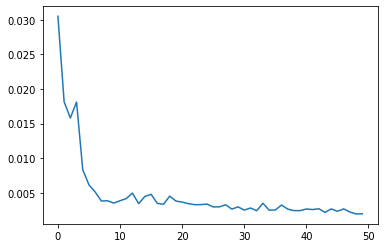

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.65894735]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

Prediction model

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.65894735], dtype=float32),
 array([0.63344204], dtype=float32),
 array([0.8148506], dtype=float32),
 array([0.88562286], dtype=float32),
 array([1.0028205], dtype=float32),
 array([0.98059064], dtype=float32),
 array([0.9028227], dtype=float32),
 array([0.79956955], dtype=float32),
 array([0.6896577], dtype=float32),
 array([0.64907736], dtype=float32),
 array([0.59930605], dtype=float32),
 array([0.63565665], dtype=float32)]

In [ ]:
test.head()

,Monthly milk production (pounds per cow)
Month,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


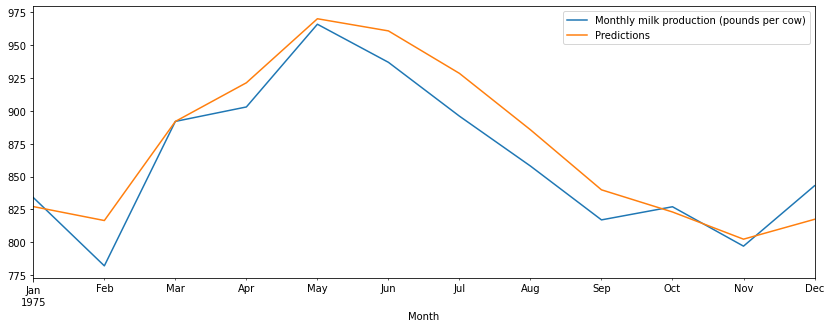

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Monthly milk production (pounds per cow)'],test['Predictions']))
print(rmse)

20.843737137589223


**Conclusion:** Hence we have successfullly implemmented rnn/lstm for dataset of milk production.